# TELECOM CHURN CASE STUDY

> This project aims to leverage machine learning techniques to accurately predicting the likelihood of telecom customers being churned . This involves analyzing a dataset with three months of data to identify patterns associated with default risks.

## Table of Contents
* [General Info](#general-information)
* [Technologies Used](#technologies-used)
* [Data Preparation and Initial Assessment](#data-preparation-and-initial-asssessment)
* [Data Cleaning](#data-cleaning)
* [Exploratory Data Analysis (EDA)](#eda)
* [Train Test Split](#Train-Test-Split)
* [Principle Component Analysis](#PCA)
* [Model Building](#model-building)
* [Conclusions](#Conclusions)

<a name="general-information"></a>
## General Information

Background

This project is part of the PG Program in AI & ML program, specifically within a Machine Learning course.

Goal

To build a machine learning model that is able to predict churning customers based on the features provided for their usage.

Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

Dataset

The dataset used in this project `train.csv` includes historical data on past telecom customters, covering their usage patterns for 3 months

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual. We will consider June and July months from datase as 'good' phase.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.). Considering August month as 'action' phase.

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. Considering the fourth month (September) as the ‘churn’ phase.



<a name="technologies-used"></a>
## Technologies used

* NumPy: For numerical computations.
* Pandas: For data manipulation and analysis.
* Matplotlib: For creating visualizations.
* Seaborn: For statistical data visualization.
* Sklearn: For Machine learning.
* Warnings: To suppress warning messages.
* Pyhon: The primary programming language used for this project.

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

import xgboost as xgb

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

import warnings
warnings.filterwarnings("ignore")

<a name="data-preparation-and-initial-asssessment"></a>
## Data preparation and initial asssessment

* Load and inspect the dataset for completeness and integrity.
* Assess initial data quality and structure to identify areas requiring cleaning or transformation.

In [5]:
# Set pandas display options to improve data visualization
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
# Load Training Data Set
telecom = pd.read_csv('train.csv')
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,...,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,31.28,87.01,7.53,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.09,204.99,1.01,0.00,0.00,0.00,8.20,0.63,0.00,0.38,...,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,122.79,42.95,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.73,31.66,0.00,...,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.00,NaN,NaN,145.00,NaN,NaN,0.00,NaN,NaN,1.00,NaN,NaN,145.00,NaN,0.00,352.91,0.00,0.00,3.96,0.00,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.00,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.00,NaN,710,0.00,0.00,0.00,0
2,2,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,60.81,103.18,0.00,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.94,84.99,0.00,0.00,0.00,0.00,2.89,1.38,0.00,0.00,...,0,6/11/2014,7/22/2014,8/24/2014,70,50,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,3,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,156.36,205.26,111.09,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.00,0.00,0.00,0.00,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.00,0.00,0.00,0.00,0.00,16.16,37.99,4.60,0.00,0.00,0.00,14.95,9.13,25.61,0.00,...,50,6/15/2014,7/21/2014,8/25/2014,110,110,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
telecom.shape

(69999, 172)

Dataset have 69999 rows and 172 columns

<a name="data-cleaning"></a>
## Data cleaning

##### **Handling irrelevant, irreliable, or non-informative columns**

In [8]:
# Find columns with all rows having a single value, all unique values, or all NaN values
columnstodrop=telecom.columns[(telecom.nunique()==1) | (telecom.nunique()==telecom.shape[0]) | (telecom.isna().sum()==telecom.shape[0])]
telecom[columnstodrop].head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,0,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,0.00,0.00,0.00,0.00,0.00
1,1,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,0.00,0.00,0.00,0.00,0.00
2,2,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,0.00,0.00,0.00,0.00,0.00
3,3,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,0.00,0.00,0.00,0.00,0.00
4,4,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
# Drop the irrelevant columns 'columnstodrop'
telecom.drop(columns=columnstodrop,inplace=True)
telecom.shape

(69999, 158)

In [10]:
#Drop date columns i.e date of last recharge columns as they seems to not helping in this case study
datecols=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
telecom.drop(columns=datecols,inplace=True)
telecom.shape

(69999, 155)

In [11]:
# Find columns having more than 60% of missing values
topnacols=(100 * telecom.isna().sum()/telecom.shape[0]).sort_values(ascending=False)
topnacols=topnacols[topnacols.ge(60)]
topnacols

,0
arpu_2g_6,74.90
total_rech_data_6,74.90
date_of_last_rech_data_6,74.90
av_rech_amt_data_6,74.90
max_rech_data_6,74.90
count_rech_3g_6,74.90
fb_user_6,74.90
night_pck_user_6,74.90
arpu_3g_6,74.90
count_rech_2g_6,74.90


In [12]:
# Drop columns selected above which are having more than 60% of missing values
telecom.drop(columns=topnacols.index,inplace=True)
telecom.shape

(69999, 125)

In [13]:
#Info after dropping irrelavnt columns
telecom.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 125 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    arpu_6              69999 non-null  float64
 1    arpu_7              69999 non-null  float64
 2    arpu_8              69999 non-null  float64
 3    onnet_mou_6         67231 non-null  float64
 4    onnet_mou_7         67312 non-null  float64
 5    onnet_mou_8         66296 non-null  float64
 6    offnet_mou_6        67231 non-null  float64
 7    offnet_mou_7        67312 non-null  float64
 8    offnet_mou_8        66296 non-null  float64
 9    roam_ic_mou_6       67231 non-null  float64
 10   roam_ic_mou_7       67312 non-null  float64
 11   roam_ic_mou_8       66296 non-null  float64
 12   roam_og_mou_6       67231 non-null  float64
 13   roam_og_mou_7       67312 non-null  float64
 14   roam_og_mou_8       66296 non-null  float64
 15   loc_og_t2t_mou_6    67231 non-null

##### **Handling missing values**

In [14]:
#Noticed few columns having missing values still, Imputing them with constant 0 using SimpleImputer
traincols=[col for col in telecom.columns if col != 'churn_probability']
imputer = SimpleImputer(strategy='constant', fill_value=0)
imputer.fit(telecom[traincols])
telecom[traincols] = imputer.transform(telecom[traincols])
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,...,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.28,87.01,7.53,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.00,0.00,65.09,204.99,1.01,0.00,0.00,0.00,8.20,0.63,0.00,0.38,0.00,0.00,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,...,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.00,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3.00,2.00,2.00,77.00,65.00,10.00,65.00,65.00,10.00,65.00,65.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1958.00,0.00,0.00,0.00,0
1,0.00,122.79,42.95,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.73,31.66,0.00,0.00,0.00,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,...,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3.00,4.00,5.00,0.00,145.00,50.00,0.00,145.00,50.00,0.00,0.00,0.00,0.00,352.91,0.00,0.00,3.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,710.00,0.00,0.00,0.00,0
2,60.81,103.18,0.00,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.00,0.00,28.94,84.99,0.00,0.00,0.00,0.00,2.89,1.38,0.00,0.00,0.00,0.00,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,...,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.00,0.00,0.00,29.91,2.48,6.38,124.29,33.83,36.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,2.00,4.00,2.00,70.00,120.00,0.00,70.00,70.00,0.00,70.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,882.00,0.00,0.00,0.00,0
3,156.36,205.26,111.09,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.00,0.00,0.00,0.00,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.00,0.00,16.16,37.99,4.60,0.00,0.00,0.00,14.95,9.13,25.61,0.00,0.00,0.00,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,...,81.03,0.00,0.00,0.00,8.

In [15]:
# Cleaned df
telecom.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 125 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    arpu_6              69999 non-null  float64
 1    arpu_7              69999 non-null  float64
 2    arpu_8              69999 non-null  float64
 3    onnet_mou_6         69999 non-null  float64
 4    onnet_mou_7         69999 non-null  float64
 5    onnet_mou_8         69999 non-null  float64
 6    offnet_mou_6        69999 non-null  float64
 7    offnet_mou_7        69999 non-null  float64
 8    offnet_mou_8        69999 non-null  float64
 9    roam_ic_mou_6       69999 non-null  float64
 10   roam_ic_mou_7       69999 non-null  float64
 11   roam_ic_mou_8       69999 non-null  float64
 12   roam_og_mou_6       69999 non-null  float64
 13   roam_og_mou_7       69999 non-null  float64
 14   roam_og_mou_8       69999 non-null  float64
 15   loc_og_t2t_mou_6    69999 non-null

##### **Handling Outliers**

In [16]:
Q1=telecom.quantile(0.01)
Q3=telecom.quantile(0.99)
IQR=Q3-Q1

In [17]:
# Prepare dataframe for the obtained Quantile and IQR
q1=pd.DataFrame(telecom.quantile(0.01))
q3=pd.DataFrame(telecom.quantile(0.99))
iqr=pd.DataFrame(telecom.quantile(0.99)-telecom.quantile(0.01))

iqr=pd.concat([q1,q3,iqr],axis=1)

iqr.columns=['Quantile 0.01','Quantile 0.99','IQR']

iqr['lower limit']=iqr['Quantile 0.01']-1.5*iqr['IQR']
iqr['upper limit']=iqr['Quantile 0.99']+1.5*iqr['IQR']
iqr['min value']=pd.DataFrame(telecom.min())
iqr['max value']=pd.DataFrame(telecom.max())
iqr

,Quantile 0.01,Quantile 0.99,IQR,lower limit,upper limit,min value,max value
arpu_6,0.00,1400.28,1400.28,-2100.41,3500.69,-2258.71,27731.09
arpu_7,0.00,1414.89,1414.89,-2122.34,3537.23,-1289.71,35145.83
arpu_8,0.00,1445.05,1445.05,-2167.58,3612.64,-945.81,33543.62
onnet_mou_6,0.00,1429.04,1429.04,-2143.56,3572.60,0.00,7376.71
onnet_mou_7,0.00,1461.34,1461.34,-2192.01,3653.36,0.00,8157.78
onnet_mou_8,0.00,1448.89,1448.89,-2173.34,3622.23,0.00,10752.56
offnet_mou_6,0.00,1520.31,1520.31,-2280.47,3800.78,0.00,8362.36
offnet_mou_7,0.00,1517.84,1517.84,-2276.76,3794.60,0.00,7043.98
offnet_mou_8,0.00,1492.23,1492.23,-2238.35,3730.58,0.00,14007.34
roam_ic_mou_6,0.00,213.83,213.83,-320.74,534.57,0.00,2850.98


Clearly few columns have outliers. Capping these by using k-sigma method.

In [18]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [19]:
telecom = telecom.apply(cap_outliers, axis=0)

In [20]:
#DF after all pre-processing
telecom.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,...,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,...,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00
mean,275.51,270.59,271.01,114.68,115.17,112.47,178.64,177.09,174.11,6.80,4.63,4.54,10.25,6.73,6.69,38.60,37.90,37.26,83.42,81.42,80.56,3.03,3.06,2.91,0.87,1.08,1.09,128.43,125.83,124.02,65.43,68.23,66.65,72.49,75.48,73.84,0.75,0.72,0.68,147.21,153.20,149.59,0.43,0.42,0.40,3.29,4.19,4.16,0.40,0.01,0.01,290.18,293.84,288.01,40.34,40.23,39.27,96.66,96.27,96.49,...,149.43,7.30,7.64,7.45,16.68,17.49,16.79,1.50,1.53,1.45,26.62,27.87,26.86,189.09,190.92,188.08,0.06,0.03,0.03,4.90,5.33,5.35,0.56,0.65,0.60,7.36,7.50,7.02,318.67,313.00,314.75,100.23,99.68,103.32,60.06,55.99,59.14,41.46,40.57,39.65,100.36,105.82,111.91,0.07,0.08,0.07,0.31,0.35,0.37,0.06,0.06,0.06,0.05,0.05,0.06,1220.56,55.50,52.85,47.61,0.10
std,263.27,264.83,268.81,208.46,214.34,211.07,238.71,241.96,239.89,26.35,21.16,20.60,36.54,27.06,27.80,77.06,76.65,75.42,118.79,115.12,114.42,7.60,7.69,7.37,2.88,3.59,3.42,181.31,177.66,176.17,167.57,175.05,172.78,167.07,175.02,173.63,3.35,3.29,3.09,293.64,306.06,302.71,4.74,4.64,4.65,8.14,10.19,9.48,1.36,0.15,0.19,377.85,387.49,383.60,72.42,73.14,70.65,124.05,122.01,123.26,...,185.15,21.60,22.95,22.53,39.27,41.42,39.69,6.12,6.18,5.85,56.03,59.20,57.23,222.93,225.22,222.03

In [21]:
telecom.shape

(69999, 125)

After pre-processing, we have 69999 rows and 125 columns

<a name="eda"></a>
## Exploratory Data Analysis

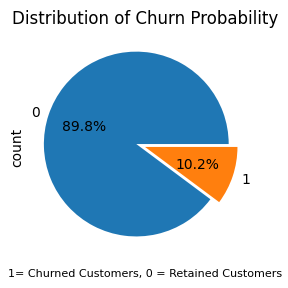

In [22]:
#Distribution on Churn Probability
plt.figure(figsize=(3,3))
telecom.churn_probability.value_counts().plot(kind='pie', autopct='%1.1f%%',explode=(0.1,0),textprops={'fontsize': 10, 'fontweight' : 15, 'color' : 'Black'})
plt.xlabel('1= Churned Customers, 0 = Retained Customers',fontsize=8)
plt.title('Distribution of Churn Probability')
plt.show()

10.2% of customers are churned.

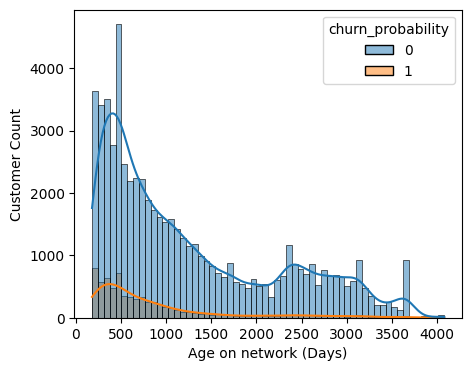

In [23]:
#Trend of Churn Probability based on AON (Age on Network in days)
plt.figure(figsize=(5,4))
sns.histplot(data=telecom,x='aon',hue='churn_probability',kde=True)
plt.ylabel("Customer Count")
plt.xlabel("Age on network (Days)")
plt.show()

Above histplot shows new customers are being churned relatively to those long standing customers.

In [24]:
#Deriving few more data for exploring other hidden patterns
df_eda=telecom.copy()
df_eda['drop_in_arpu_during_action_phase'] = np.where(((df_eda['arpu_8'] - ((df_eda['arpu_6'] + df_eda['arpu_7'])/2)) < 0), "Yes", "No")
df_eda['drop_in_og_mou_during_action_phase'] = np.where(((df_eda['total_og_mou_8'] - ((df_eda['total_og_mou_6'] + df_eda['total_og_mou_7'])/2)) < 0), "Yes", "No")
df_eda['drop_in_ic_mou_during_action_phase'] = np.where(((df_eda['total_ic_mou_8'] - ((df_eda['total_ic_mou_6'] + df_eda['total_ic_mou_7'])/2)) < 0), "Yes", "No")
df_eda['drop_in_rech_num_during_action_phase'] = np.where(((df_eda['total_rech_num_8'] - ((df_eda['total_rech_num_6'] + df_eda['total_rech_num_7'])/2)) < 0), "Yes", "No")
df_eda['drop_in_rech_amt_during_action_phase'] = np.where(((df_eda['total_rech_amt_8'] - ((df_eda['total_rech_amt_6'] + df_eda['total_rech_amt_7'])/2)) < 0), "Yes", "No")
df_eda['drop_in_vbc_during_action_phase'] = np.where(((df_eda['aug_vbc_3g'] - ((df_eda['jun_vbc_3g'] + df_eda['jul_vbc_3g'])/2)) < 0), "Yes", "No")

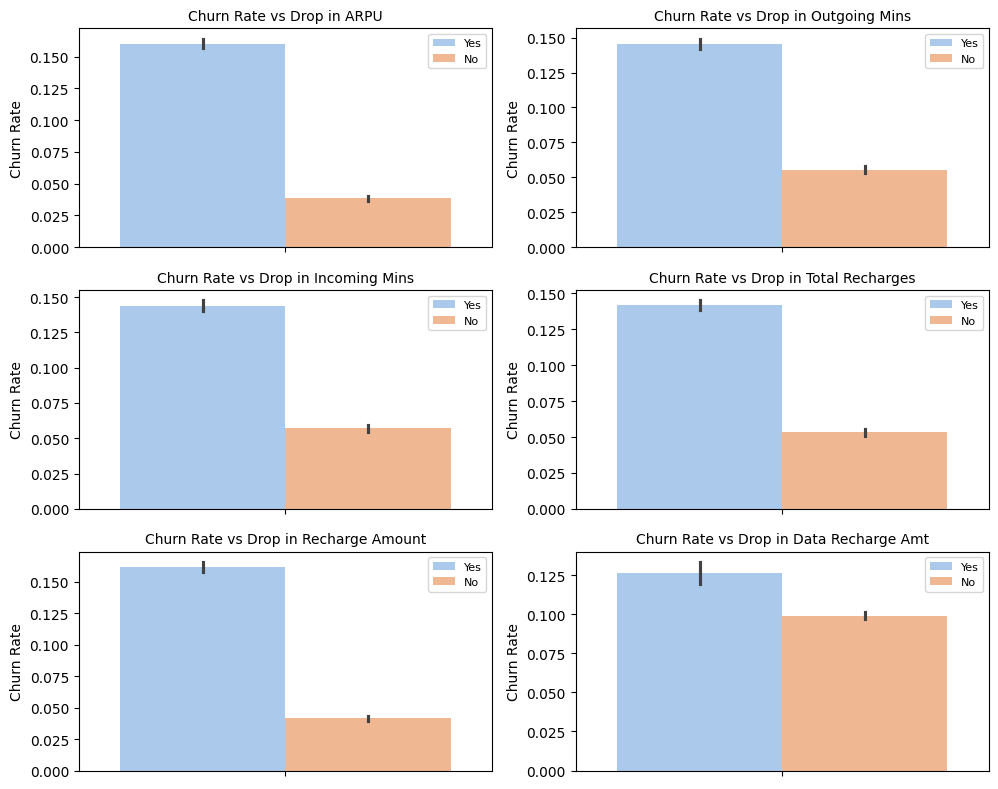

In [25]:
#Plot defined data
plt.figure(figsize=(10,8))
plt.subplot(321)
sns.barplot(data=df_eda,y='churn_probability',hue='drop_in_arpu_during_action_phase',hue_order=["Yes","No"],palette="pastel")
plt.ylabel('Churn Rate')
plt.legend(loc='upper right',fontsize=8,title='')
plt.title("Churn Rate vs Drop in ARPU", fontsize=10)
plt.subplot(322)
sns.barplot(data=df_eda,y='churn_probability',hue='drop_in_og_mou_during_action_phase',hue_order=["Yes","No"],palette="pastel")
plt.ylabel('Churn Rate')
plt.legend(loc='upper right',fontsize=8,title='')
plt.title("Churn Rate vs Drop in Outgoing Mins", fontsize=10)
plt.subplot(323)
sns.barplot(data=df_eda,y='churn_probability',hue='drop_in_ic_mou_during_action_phase',hue_order=["Yes","No"],palette="pastel")
plt.ylabel('Churn Rate')
plt.legend(loc='upper right',fontsize=8,title='')
plt.title("Churn Rate vs Drop in Incoming Mins", fontsize=10)
plt.subplot(324)
sns.barplot(data=df_eda,y='churn_probability',hue='drop_in_rech_num_during_action_phase',hue_order=["Yes","No"],palette="pastel")
plt.ylabel('Churn Rate')
plt.legend(loc='upper right',fontsize=8,title='')
plt.title("Churn Rate vs Drop in Total Recharges", fontsize=10)
plt.subplot(325)
sns.barplot(data=df_eda,y='churn_probability',hue='drop_in_rech_amt_during_action_phase',hue_order=["Yes","No"],palette="pastel")
plt.ylabel('Churn Rate')
plt.legend(loc='upper right',fontsize=8,title='')
plt.title("Drop in Recharge Amout during action Phase")
plt.title("Churn Rate vs Drop in Recharge Amount", fontsize=10)
plt.subplot(326)
sns.barplot(data=df_eda,y='churn_probability',hue='drop_in_vbc_during_action_phase',hue_order=["Yes","No"],palette="pastel")
plt.ylabel('Churn Rate')
plt.legend(loc='upper right',fontsize=8,title='')
plt.title("Churn Rate vs Drop in Data Recharge Amt", fontsize=10)
plt.tight_layout()
plt.show()

Its clear trend that Churn Rate is high (~14%) for cases when Drop in below data fields is noticed compared to average of previous two months.
* ARPU (Average Revenue per User)
* Incoming Minutes
* Outgoing Minutes
* Total Recharges
* Total Recharge Amount

<a name="Train-Test-Split"></a>
## Train Test Split

Assign X with independent variables and y with our Target variable

In [26]:
X = telecom.drop(['churn_probability'],axis=1)
y = telecom['churn_probability']

Split available data into Train (70%) and Test (30%)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48999, 124), (21000, 124), (48999,), (21000,))

<a name="Feature Scaling"></a>
## Feature Scaling

In [29]:
#Scale data using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_test.columns
X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,...,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.91,1.11,-1.03,-0.42,1.90,-0.53,-0.75,2.67,-0.72,-0.23,-0.21,-0.22,0.43,0.67,-0.24,-0.50,-0.18,-0.49,-0.70,-0.31,-0.70,-0.40,-0.40,-0.39,-0.30,2.34,-0.32,-0.71,-0.31,-0.70,-0.39,2.43,-0.39,-0.43,3.64,-0.42,-0.22,-0.22,-0.22,-0.50,3.45,-0.49,-0.09,-0.09,-0.09,-0.40,6.51,-0.27,-0.29,-0.04,-0.04,-0.77,2.73,-0.75,-0.56,-0.29,-0.56,-0.78,-0.48,-0.77,...,-0.50,-0.80,-0.34,0.05,-0.33,-0.42,-0.30,-0.42,-0.25,-0.25,-0.25,-0.48,-0.24,-0.47,-0.85,-0.47,-0.83,-0.43,-0.30,-0.32,-0.21,0.39,-0.13,-0.19,-0.19,-0.19,-0.40,1.92,-0.81,-0.88,1.03,-0.97,-0.88,-0.50,-1.07,-0.83,-0.64,-0.76,-0.32,-0.31,-0.31,-0.31,-0.32,-0.32,-0.28,-0.28,-0.28,-0.32,-0.32,-0.33,-0.25,-0.24,-0.25,-0.20,-0.20,-0.20,-0.39,-0.32,-0.31,-0.30
1,1.90,1.13,-0.08,1.57,0.78,-0.41,3.98,0.93,-0.32,2.42,3.68,3.14,2.50,6.43,4.16,1.60,0.65,-0.49,4.01,-0.17,-0.70,-0.34,-0.16,-0.39,-0.30,1.73,1.14,3.27,0.14,-0.70,1.04,0.24,-0.39,2.89,0.93,-0.42,-0.22,-0.22,-0.22,2.21,0.64,-0.49,-0.09,-0.09,-0.09,-0.40,-0.41,-0.44,-0.29,-0.04,-0.04,3.25,0.53,-0.75,1.79,0.42,-0.56,2.04,-0.48,-0.78,...,-0.23,-0.80,0.00,-0.19,-0.33,0.45,0.31,-0.42,-0.25,-0.25,-0.25,0.27,0.10,-0.47,1.68,-0.21,-0.84,-0.43,-0.30,-0.32,-0.21,-0.22,-0.22,0.06,0.10,-0.19,0.61,0.25,-0.00,1.98,1.44,-0.35,0.31,0.31,-0.55,0.94,0.75,-0.76,-0.32,-0.31,-0.31,-0.31,-0.32,-0.32,-0.28,-0.28,-0.28,0.70,-0.32,0.57,-0.25,-0.24,-0.25,-0.20,-0.20,-0.20,-0.40,-0.32,-0.31,-0.30
2,-0.04,-0.82,-1.00,-0.04,-0.41,-0.53,-0.45,-0.73,-0.72,0.13,0.03,0.01,4.46,0.79,-0.21,-0.50,-0.49,-0.49,-0.69,-0.71,-0.70,-0.40,-0.40,-0.39,-0.30,-0.30,-0.32,-0.70,-0.71,-0.70,-0.39,-0.39,-0.39,-0.43,-0.43,-0.42,-0.22,-0.22,-0.22,-0.50,-0.50,-0.49,-0.09,-0.09,-0.09,-0.40,-0.41,-0.44,-0.29,-0.04,-0.04,-0.76,-0.76,-0.75,-0.48,-0.55,-0.56,-0.68,-0.79,-0.78,...,-0.81,-0.80,-0.34,-0.33,-0.33,-0.42,-0.42,-0.42,-0.25,-0.25,-0.25,-0.48,-0.47,-0.47,-0.77,-0.85,-0.84,-0.43,-0.30,-0.32,-0.21,-0.22,-0.22,-0.14,-0.19,-0.19,-0.06,-1.09,-0.81,0.01,-0.82,-0.97,0.11,-0.54,-1.07,-0.14,-0.08,-0.76,-0.32,-0.31,-0.31,-0.31,-0.32,-0.32,-0.28,-0.28,-0.28,-0.32,-0.32,-0.33,-0.25,-0.24,-0.25,-0.20,-0.20,-0.20,-0.46,-0.32,-0.31,-0.30
3,-0.93,-0.86,-0.70,-0.54,-0.54,-0.53,-0.73,-0.73,-0.72,-0.26,-0.22,-0.22,-0.28,-0.25,-0.24,-0.48,-0.49,-0.49,-0.68,-0.71,-0.70,-0.40,-0.40,-0.39,0.25,3.16,-0.32,-0.69,-0.

<a name="PCA"></a>
## PCA - Principal Component Analysis

In [30]:
#PCA on scaled data
pca = PCA()
pca.fit_transform(X_train_scaled)

array([[-4.04183117e+00,  9.39597827e-02,  2.76908547e+00, ...,
        -3.61981087e-03, -5.76115339e-03,  1.29753738e-03],
       [-1.95229776e-01, -3.16684803e+00, -2.96832958e+00, ...,
         2.42985272e-03, -1.08942696e-02, -1.30935198e-03],
       [ 8.85138918e+00, -7.17770219e-02, -3.27405029e+00, ...,
         5.67498957e-03,  4.24123817e-03, -1.74177877e-03],
       ...,
       [-2.01859846e+00, -1.22844080e+00, -3.48449016e-01, ...,
        -7.67304025e-03, -5.56501165e-03,  4.07416268e-03],
       [-5.95061358e-01, -6.70758397e-01,  6.36044742e+00, ...,
         5.19110012e-04,  3.37162784e-03, -5.10408920e-03],
       [ 1.31478178e+01, -7.18029837e+00,  3.17699194e-01, ...,
         2.90196795e-02,  8.10752591e-02, -7.11542753e-02]])

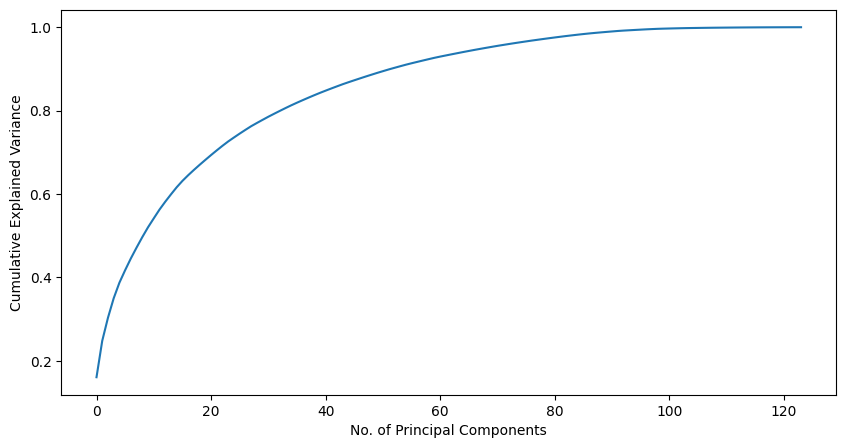

In [31]:
#Plot explaining Cumulative Variance
fig = plt.figure(figsize = (10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

95% of variance is explained by around 70 principal components

In [32]:
#PCA with components expalaining 95% of variance
pca = PCA(0.95)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)
X_train_scaled.shape,X_test_scaled_pca.shape

((48999, 124), (21000, 69))

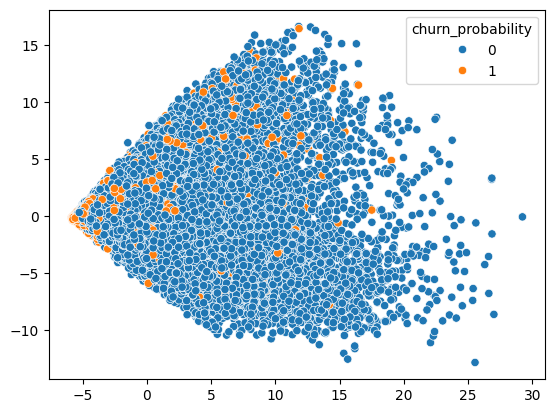

In [33]:
# Lets plot first two pricipal components
sns.scatterplot(x=X_train_scaled_pca[:,0], y=X_train_scaled_pca[:,1], hue=y_train)
plt.show()

The data points seem to form distinct clusters. This suggests that the PCA has effectively captured the underlying structure of the data

<BarContainer object of 69 artists>

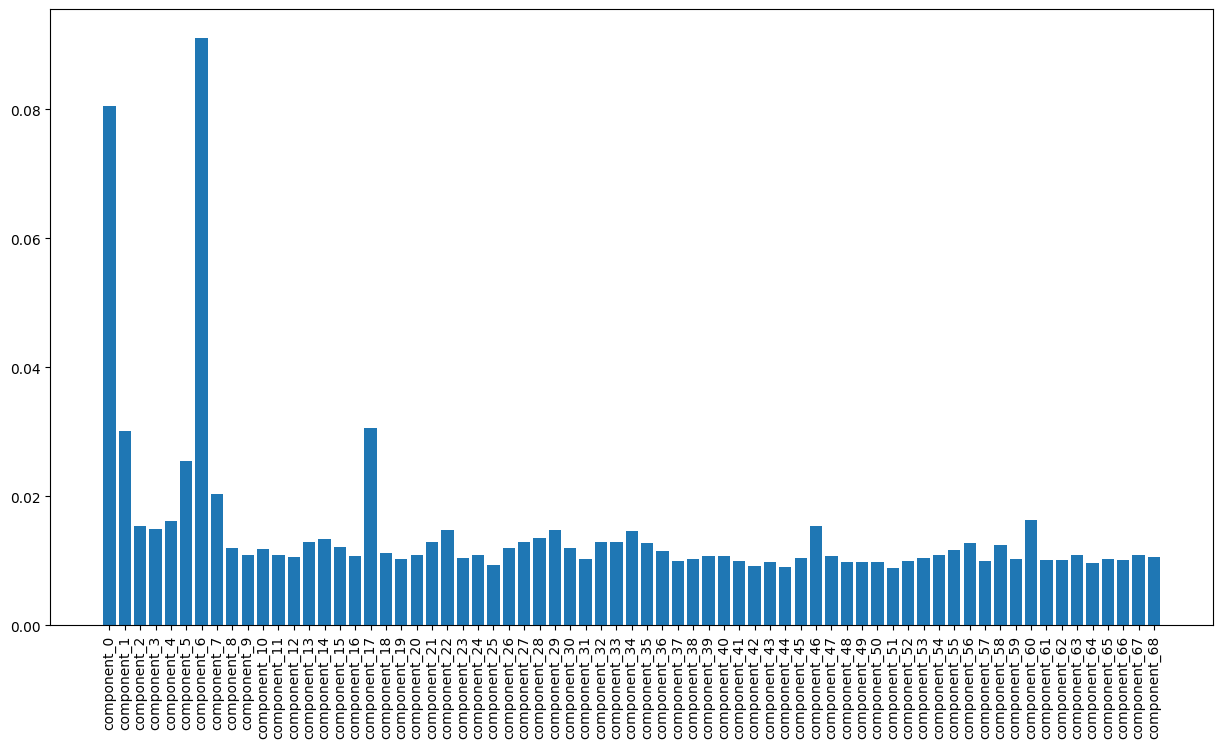

In [34]:
#Lets fit pca component data and identify feature importance based on principal components
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_scaled_pca, y_train)
feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(X_train_scaled_pca.shape[1])],'importance':rf.feature_importances_})
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])

<a name="model-building"></a>
## Model Building

Defining reusable funcitons

In [35]:
def predict_n_print_model_metrics(model,X_train_metric,y_train_metric,X_test_metric,y_test_metric):
    model_train_predicts=model.predict(X_train_metric)
    model_test_predicts=model.predict(X_test_metric)

    print("Training accuracy      :", model.score(X_train_metric, y_train_metric))
    print("Test accuracy          :", model.score(X_test_metric, y_test_metric))
    print("Precision              :",precision_score(y_test_metric, model_test_predicts))
    print("Recall                 :",recall_score(y_test_metric, model_test_predicts))
    print("Train Confusion Matrix :\n",confusion_matrix(y_train_metric, model_train_predicts))
    print("Test Confusion Matrix  :\n",confusion_matrix(y_test_metric, model_test_predicts))
    print("Classification Report  :\n",classification_report(y_test_metric, model_test_predicts))
    RocCurveDisplay.from_estimator(model,X_train_metric, y_train_metric)
    plt.show()

Approach:
* Using Pipeline and GridSearch, identify best parms for each model.
* Pipeline have Imputer (to handle missing values, SMOTE (to handle class imbalance), StandardScaler (for scaling data), PCA & Classifier
**

#### Logistic Regression

In [36]:
lr = LogisticRegression(max_iter=1000)
pipeline = imbpipeline(steps = [('imputation',SimpleImputer(strategy='constant', fill_value=0)),
                                ('smote', SMOTE(sampling_strategy='auto')),
                                ('scaling',StandardScaler()),
                                ('pca',PCA(0.95)),
                                ('classification',lr)])

parms_grid_gs = {
            'classification__C': [0.001, 0.01, 0.1, 1, 10],
            'classification__penalty': ['l1', 'l2'],
            'classification__solver': ['liblinear', 'saga']
}

stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=parms_grid_gs,
                           cv = stratified_kfold,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [37]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 3.78 s, sys: 2.68 s, total: 6.46 s
Wall time: 42.1 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(fill_value=0,
                                                      strategy='constant')),
                                       ('smote', SMOTE()),
                                       ('scaling', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('classification',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classification__C': [0.001, 0.01, 0.1, 1, 10],
                         'classification__penalty': ['l1', 'l2'],
                         'classification__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

Training accuracy      : 0.8037510969611624
Test accuracy          : 0.8052857142857143
Precision              : 0.32078530259365995
Recall                 : 0.8484992853739877
Train Confusion Matrix :
 [[35104  8862]
 [  754  4279]]
Test Confusion Matrix  :
 [[15130  3771]
 [  318  1781]]
Classification Report  :
               precision    recall  f1-score   support

           0       0.98      0.80      0.88     18901
           1       0.32      0.85      0.47      2099

    accuracy                           0.81     21000
   macro avg       0.65      0.82      0.67     21000
weighted avg       0.91      0.81      0.84     21000



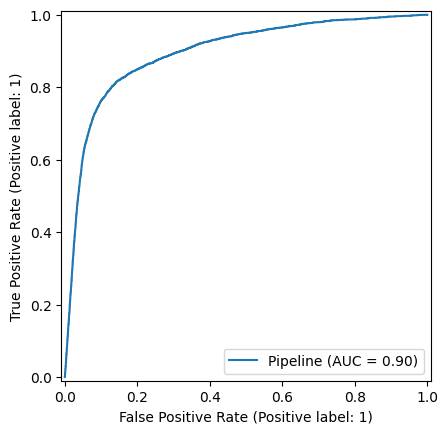

In [38]:
lr_best=grid_search.best_estimator_
predict_n_print_model_metrics(lr_best, X_train, y_train,X_test,y_test)

#### Random Forest

In [39]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
pipeline = imbpipeline(steps = [('imputation',SimpleImputer(strategy='constant', fill_value=0)),
                                ('smote', SMOTE(sampling_strategy='auto')),
                                ('scaling',StandardScaler()),
                                ('pca',PCA(0.95)),
                                ('classification',rf)])

parms_grid_gs = {
        'classification__max_depth': [2,3,5,10,25,50],
        'classification__min_samples_leaf': [5,10,20,50,100,200],
        'classification__n_estimators': [10, 25, 50, 100,200]
        }

stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=parms_grid_gs,
                           cv = stratified_kfold,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [40]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
CPU times: user 3min 8s, sys: 6.26 s, total: 3min 14s
Wall time: 1h 14min 15s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(fill_value=0,
                                                      strategy='constant')),
                                       ('smote', SMOTE()),
                                       ('scaling', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('classification',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classification__max_depth': [2, 3, 5, 10, 25, 50],
                         'classification__min_samples_leaf': [5, 10, 20, 50,
                                                              100, 200],
                         'classification__n_estimators': [10, 25, 50, 100,
                                                          200]},
             scoring='accuracy', verbose=1)

Training accuracy      : 0.9776526051552072
Test accuracy          : 0.903952380952381
Precision              : 0.5144978783592645
Recall                 : 0.6931872320152453
Train Confusion Matrix :
 [[42924  1042]
 [   53  4980]]
Test Confusion Matrix  :
 [[17528  1373]
 [  644  1455]]
Classification Report  :
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     18901
           1       0.51      0.69      0.59      2099

    accuracy                           0.90     21000
   macro avg       0.74      0.81      0.77     21000
weighted avg       0.92      0.90      0.91     21000



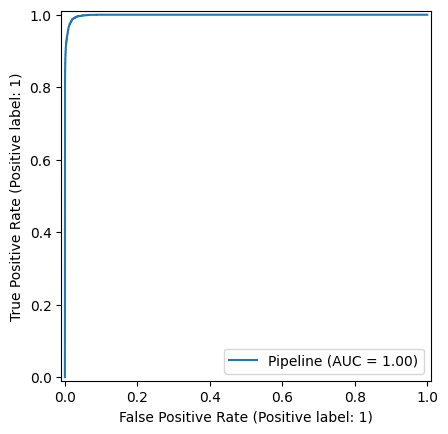

In [41]:
rf_best=grid_search.best_estimator_
predict_n_print_model_metrics(rf_best, X_train, y_train,X_test,y_test)

#### Adaboost

In [42]:
adb = AdaBoostClassifier(random_state=42)
pipeline = imbpipeline(steps = [('imputation',SimpleImputer(strategy='constant', fill_value=0)),
                                ('smote', SMOTE(sampling_strategy='auto')),
                                ('scaling',StandardScaler()),
                                ('pca',PCA(0.95)),
                                ('classification',adb)])

parms_grid_gs = {'classification__n_estimators': [50, 100, 200],'classification__learning_rate': [0.1, 0.05, 0.01]}

stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=parms_grid_gs,
                           cv = stratified_kfold,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [43]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 4min 10s, sys: 2.14 s, total: 4min 12s
Wall time: 15min 58s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(fill_value=0,
                                                      strategy='constant')),
                                       ('smote', SMOTE()),
                                       ('scaling', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('classification',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classification__learning_rate': [0.1, 0.05, 0.01],
                         'classification__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

Training accuracy      : 0.8279352639849793
Test accuracy          : 0.8322857142857143
Precision              : 0.3528438469493278
Recall                 : 0.8127679847546451
Train Confusion Matrix :
 [[36526  7440]
 [  991  4042]]
Test Confusion Matrix  :
 [[15772  3129]
 [  393  1706]]
Classification Report  :
               precision    recall  f1-score   support

           0       0.98      0.83      0.90     18901
           1       0.35      0.81      0.49      2099

    accuracy                           0.83     21000
   macro avg       0.66      0.82      0.70     21000
weighted avg       0.91      0.83      0.86     21000



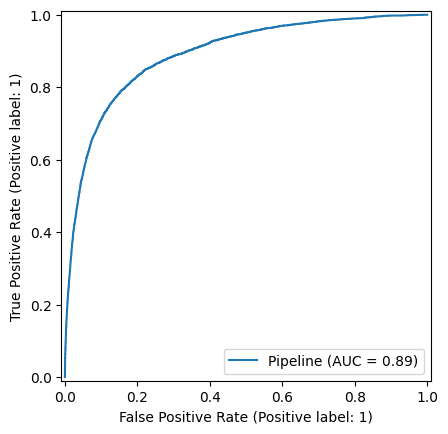

In [44]:
adb_best=grid_search.best_estimator_
predict_n_print_model_metrics(adb_best, X_train, y_train,X_test,y_test)

#### XGBoost

As XGBoost can handle class imbalance, missing values and doest expect data to be scaled, using randomsearch directly on XGBoost instead of pipeline

In [45]:
xgb_cfl = xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1,nthread=6,device='cuda' )

param_grid_rs = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0.0, 0.1, 0.2],
    'scale_pos_weight': [0,1,3],
    'max_delta_step': [0, 1, 2]
}

stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
random_search = RandomizedSearchCV(
    estimator=xgb_cfl,
    param_distributions=param_grid_rs,
    n_iter=200,
    scoring='accuracy',
    n_jobs=-1,
    cv=stratified_kfold,
    verbose=1,
    random_state=42
)

In [46]:
%%time
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: user 15.2 s, sys: 2.42 s, total: 17.6 s
Wall time: 32min 45s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device='cuda',
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           import...
                                           nthread=6, num_parallel_tree=None, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_delta_step': [0, 1, 2],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'scale_pos_weight': [0, 1, 3],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

Training accuracy      : 0.9585093573338231
Test accuracy          : 0.9431428571428572
Precision              : 0.7635410599883518
Recall                 : 0.6245831348261077
Train Confusion Matrix :
 [[43297   669]
 [ 1364  3669]]
Test Confusion Matrix  :
 [[18495   406]
 [  788  1311]]
Classification Report  :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     18901
           1       0.76      0.62      0.69      2099

    accuracy                           0.94     21000
   macro avg       0.86      0.80      0.83     21000
weighted avg       0.94      0.94      0.94     21000



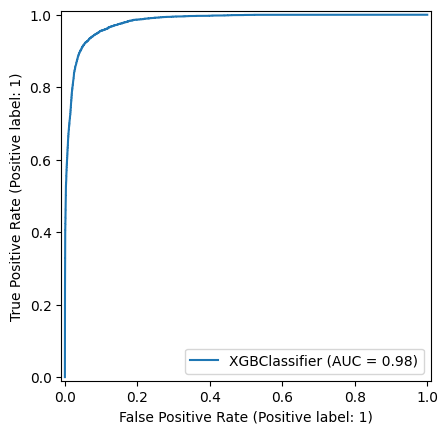

In [47]:
xgb_best=random_search.best_estimator_
predict_n_print_model_metrics(xgb_best, X_train, y_train,X_test,y_test)

#### Feature Importance

In [48]:
#Identify top 20 features based on their importance
imp_df = pd.DataFrame({"Varname": X_train.columns,"Imp": xgb_best.feature_importances_})

In [49]:
imp_df.sort_values(by="Imp", ascending=False).head(20)

,Varname,Imp
80,total_ic_mou_8,0.22
65,loc_ic_mou_8,0.13
14,roam_og_mou_8,0.03
104,vol_2g_mb_8,0.02
59,loc_ic_t2m_mou_8,0.02
101,last_day_rch_amt_8,0.02
53,total_og_mou_8,0.01
107,vol_3g_mb_8,0.01
83,spl_ic_mou_8,0.01
11,roam_ic_mou_8,0.01


Above are top 20 features based on their importance

#### Predict Unseen Data

In [50]:
best_model=xgb_best

In [51]:
#Load Unseen data
unseen = pd.read_csv('test.csv')
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,...,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,91.88,65.33,64.44,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.00,0.00,0.00,0.00,0.00,0.00,48.93,7.68,28.48,0.00,0.00,0.00,0.00,0.00,0.03,0.00,...,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,414.17,515.57,360.87,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.76,17.68,0.00,0.00,0.80,0.00,0.00,0.00,0.00,...,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,329.84,434.88,746.24,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,500,500,6/29/2014,7/27/2014,8/28/2014,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,43.55,171.39,24.40,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.00,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37.09,96.53,0.00,0.00,0.00,0.00,0.00,12.03,1.15,0.00,...,150,0,6/25/2014,7/30/2014,8/24/2014,110,150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00

In [52]:
submission_data = unseen.set_index('id')[X_train.columns]
submission_data.shape

(30000, 124)

In [53]:
submission_data[X_train.columns] = imputer.transform(submission_data[X_train.columns])
submission_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,...,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,91.88,65.33,64.44,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.00,0.00,0.00,48.93,7.68,28.48,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,...,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.00,0.00,0.00,5.00,5.00,4.00,103.00,90.00,60.00,50.00,30.00,30.00,30.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1692.00,0.00,0.00,0.00
70000,414.17,515.57,360.87,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.00,0.00,0.00,0.00,23.76,17.68,0.00,0.00,0.80,0.00,0.00,0.00,0.00,0.00,0.00,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,...,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5.00,4.00,5.00,500.00,500.00,500.00,250.00,250.00,250.00,250.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2533.00,0.00,0.00,0.00
70001,329.84,434.88,746.24,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,9.00,5.00,500.00,1000.00,1000.00,300.00,500.00,500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,277.00,525.61,758.41,241.84
70002,43.55,171.39,24.40,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.00,6.18,0.00,8.26,98.

In [54]:
unseen['churn_probability'] = best_model.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [55]:
output.churn_probability.value_counts()

,count
churn_probability,
0,27445
1,2555


In [59]:
output.to_csv('Submission.csv',index=False)

<a name="Conclusions"></a>
## Conclusions

 **Technical:**

 * **Data Preprocessing:** The initial dataset underwent extensive cleaning, including handling irrelevant columns, missing values (imputed with 0), and outliers (capped using the k-sigma method).  This preprocessing step was crucial for ensuring the quality of the data fed into the models.

 * **Feature Engineering:** New features were derived from existing ones (e.g., 'drop_in_arpu_during_action_phase') to capture potential relationships between variables and churn probability.  These engineered features improved the model's ability to identify patterns indicative of churn.

 * **Dimensionality Reduction:** Principal Component Analysis (PCA) was employed to reduce the number of features while preserving 95% of the variance in the data. This not only improved model training efficiency but also helped mitigate the curse of dimensionality.

 * **Model Selection and Tuning:** Several models (Logistic Regression, Random Forest, AdaBoost, and XGBoost) were trained and compared.  Pipelines were used to ensure consistent preprocessing for each model.  Hyperparameter tuning using GridSearchCV and RandomizedSearchCV was conducted to optimize model performance.  The XGBoost model ultimately yielded the best results.


 * **Handling Class Imbalance:**  SMOTE (Synthetic Minority Over-sampling Technique) was used within the pipelines for Logistic Regression, Random Forest, and AdaBoost models to address the class imbalance issue in the training data.  XGBoost's `scale_pos_weight` parameter helped handle imbalance without separate oversampling.

 * **Feature Importance:** XGBoost's feature importance scores were used to identify the most influential features in predicting churn.  This analysis can guide further investigation and potentially lead to more targeted customer retention strategies.


 **Business:**

 * **Customer Churn Drivers:**  The analysis revealed several key factors associated with customer churn.  Decreases in ARPU, outgoing minutes of usage (OG_MOU), incoming minutes of usage (IC_MOU), recharge numbers, recharge amounts, and 3G data usage during the action phase (the last two months) strongly correlated with a higher probability of churn.

 * **Proactive Retention Strategies:**  The model can be used to identify customers at high risk of churning, allowing for proactive intervention.  Targeted campaigns or incentives can be deployed to these at-risk customers to encourage them to stay.

 * **Resource Allocation:** Understanding the drivers of churn enables more efficient allocation of resources. Resources can be focused on retaining high-value customers identified as being at risk, rather than on customers who are less likely to churn.

 * **Model Deployment:** The final model (XGBoost) can be used to continuously monitor and predict churn probabilities in real-time, providing valuable insights for ongoing customer retention efforts.